In [96]:
import numpy as np
import pandas as pd
import imodels
from imodels import FIGSClassifier, GreedyRuleListClassifier, HSTreeClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

<a target="_blank" href="https://colab.research.google.com/github/choonghwanlee/interpretableml-2-aipi590-f24/blob/main/main.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### The Data

We will work with the Compas dataset, which contains information about criminals and whether they recidivated (re-commit a crime) in the next two years. The dataset came to public attention in 2016 after ProPublica published an article critiquing Northpointe's COMPAS recidivism algorithm for being racially biased against African Americans. 

Given the amount of controversy and scrutiny that ensued, we explore whether interpretable models can shed light on potential algorithmic biases while also matching the predictive performance of COMPAS.

Given features like jail time, felony count, charge degree, race, gender, age, etc., our target is a binary class determining whether they'll reoffend in the next two years (class=1) or not (class=0)

In [144]:
compas = imodels.get_clean_dataset('compas_two_year_clean')

In [145]:
features = pd.DataFrame(data=compas[0], columns=compas[2])
target = compas[1]
col_names = compas[2]

In [146]:
features.head()

,age,priors_count,days_b_screening_arrest,c_jail_time,juv_fel_count,juv_other_count,juv_misd_count,c_charge_degree:F,c_charge_degree:M,race:African-American,race:Asian,race:Caucasian,race:Hispanic,race:Native_American,race:Other,age_cat:25_-_45,age_cat:Greater_than_45,age_cat:Less_than_25,sex:Female,sex:Male
0,69.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,34.0,0.0,-1.0,10.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,24.0,4.0,-1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,41.0,14.0,-1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [147]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, random_state=0)


### Algoritm 1: Fast interpretable greedy-tree sums (FIGs)

In [46]:
## Initialize classifier
figs = FIGSClassifier(max_rules=7)

In [154]:
## Fit to classifier
figs.fit(X_train.values, y_train, feature_names=col_names)


FIGSClassifier(max_rules=7)

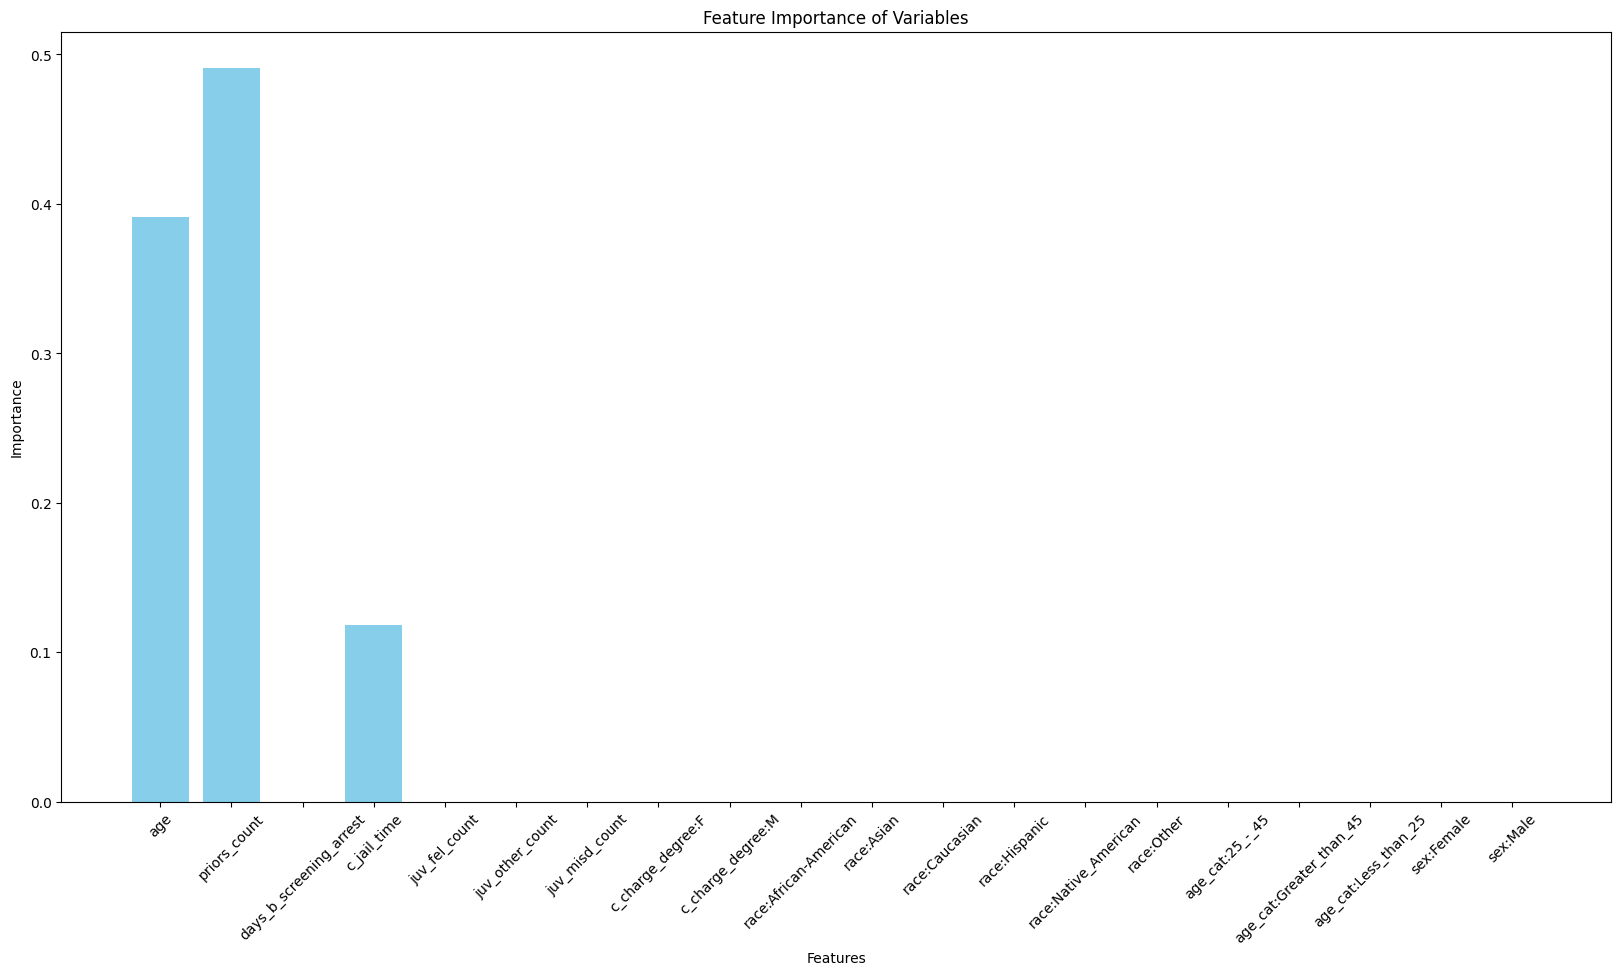

In [150]:
## Feature importance 
plt.figure(figsize=(20, 10))  # Adjust the figure size if needed
plt.bar(col_names, figs.feature_importances_, color='skyblue')

# Add titles and labels
plt.title('Feature Importance of Variables')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.ylabel('Importance')

# Display the plot
plt.show()


In [49]:
## Generate predictions on test data
preds = figs.predict(X_test) 

In [53]:
## Evaluation
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       808
           1       0.67      0.66      0.66       735

    accuracy                           0.68      1543
   macro avg       0.68      0.68      0.68      1543
weighted avg       0.68      0.68      0.68      1543



### Algorithm 2: Greedy Rule List (CART)

In [64]:
grl = GreedyRuleListClassifier(max_depth=5)

In [138]:
grl.fit(X_train, y_train, feature_names=col_names, verbose=True)
grl

48.71 -> priors_count -> 34.25 (2429) 64.68 (2200)
34.25 -> age -> 28.95 (1979) 57.56 (450)
28.95 -> age -> 22.28 (893) 34.44 (1086)
22.28 -> c_jail_time -> 19.81 (732) 33.54 (161)
19.81 -> days_b_screening_arrest -> 11.49 (174) 22.40 (558)


GreedyRuleListClassifier()

In [69]:
pred = grl.predict(X_test)

In [71]:
## Evaluation
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.64       808
           1       0.62      0.76      0.68       735

    accuracy                           0.66      1543
   macro avg       0.67      0.66      0.66      1543
weighted avg       0.67      0.66      0.66      1543



### Algorithm 3: Hierarchical shrinkage

In [133]:
hst = HSTreeClassifierCV(max_leaf_nodes=7)

In [134]:
hst.fit(X_train.values, y_train, feature_names=col_names)

/Users/choonghwanlee/interpretableml-2-aipi590-f24/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/choonghwanlee/interpretableml-2-aipi590-f24/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/choonghwanlee/interpretableml-2-aipi590-f24/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/choonghwanlee/interpretableml-2-aipi590-f24/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/choonghwanlee/interpretableml-2-aipi590-f24/env/lib/python3.12/site-packages/sklearn/metrics/

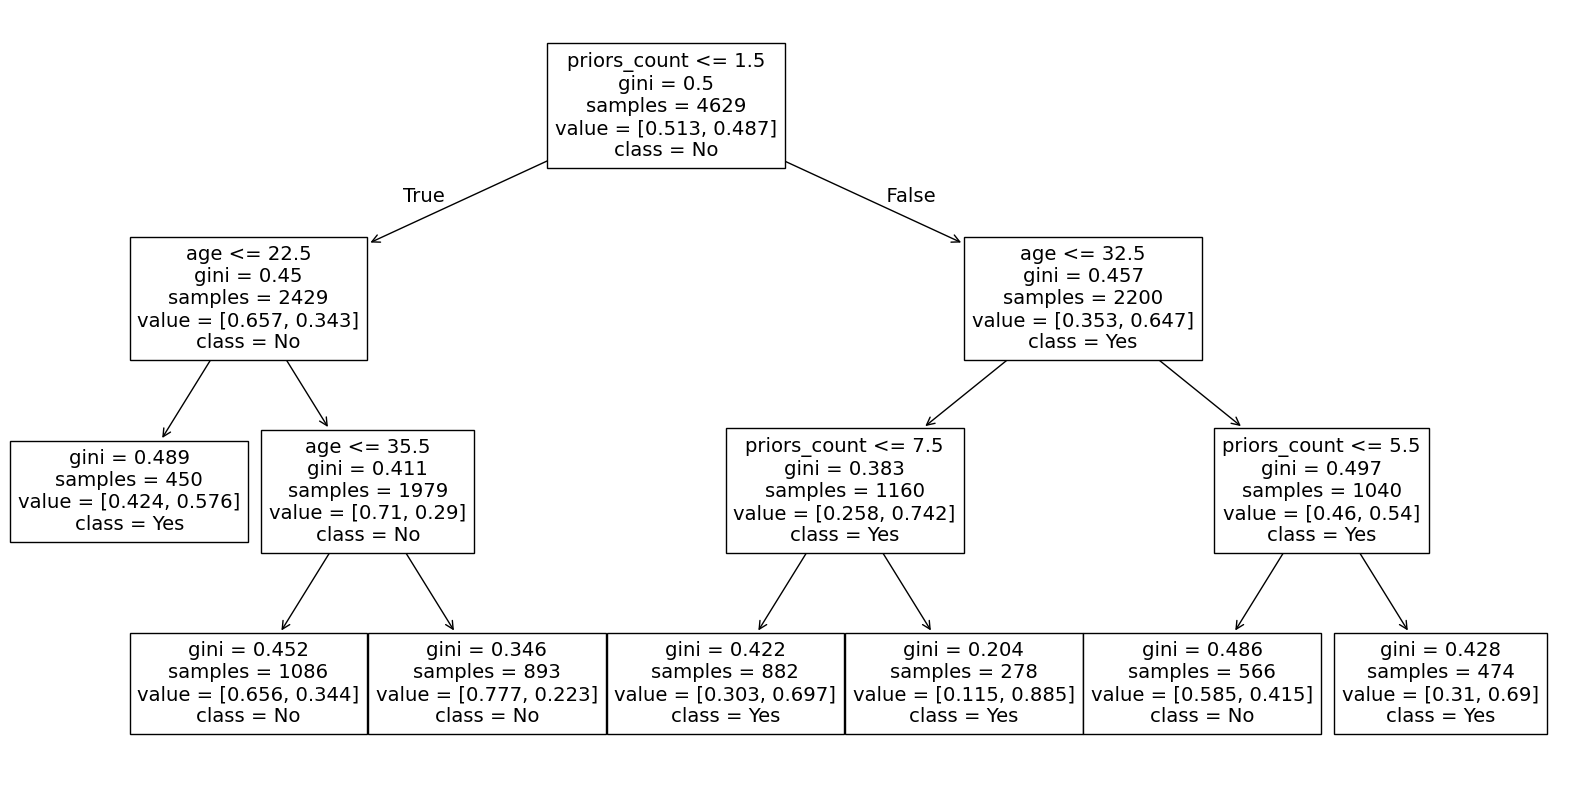

In [135]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# visualize the model
plt.figure(figsize=(20, 10))  # Adjust the figure size if needed
plot_tree(hst.estimator_, feature_names=col_names, class_names=['No', 'Yes'])
plt.show()

In [136]:
preds = hst.predict(X_test.values)

In [137]:
## Evaluation
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       808
           1       0.68      0.64      0.66       735

    accuracy                           0.68      1543
   macro avg       0.68      0.68      0.68      1543
weighted avg       0.68      0.68      0.68      1543



### Conclusion:

Through this exercise we note how interpretable models can give us better insight into the features that may affect recividism. Namely, all of our interpretable models prioritize age, number of prior offenses, and cumulative jail time as the most important features for predicting two year recividism. 

However, the general accuracy of the model isn't the best, hovering at around 0.68. This speaks to the difficulty of predicting human behavior in areas such as crime.